Another implimentation of simple momentum strategy

In [76]:
# Import modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  # use a very popular plot style


In [77]:
# Store data manually
FB = pd.read_csv('FB.csv')
FB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-25,280.980011,288.059998,277.750000,278.739990,278.739990,24505600
1,2021-03-26,278.299988,284.500000,277.769989,283.019989,283.019989,17629200
2,2021-03-29,285.769989,293.179993,284.700012,290.820007,290.820007,21718800
3,2021-03-30,289.829987,292.470001,286.700012,288.000000,288.000000,17474500
4,2021-03-31,289.989990,296.500000,288.609985,294.529999,294.529999,19498200
...,...,...,...,...,...,...,...
249,2022-03-21,214.500000,214.710007,207.630005,211.490005,211.490005,30142300
250,2022-03-22,211.369995,219.460007,210.179993,216.649994,216.649994,31998800
251,2022-03-23,213.330002,216.800003,212.160004,213.460007,213.460007,23717300
252,2022-03-24,215.000000,220.669998,214.789993,219.570007,219.570007,31466000


In [78]:
# Creat simple 5-day MA
SMA5 = pd.DataFrame()
SMA5['Adj Close'] = FB['Adj Close'].rolling(window=5).mean().shift()
# SMA5[27:35]


In [79]:
SMA20 = pd.DataFrame()
SMA20['Adj Close'] = FB['Adj Close'].rolling(window=20).mean().shift()
# SMA20[96:105]


In [80]:
# Store data into a new dataframe
data = pd.DataFrame()
data['FB'] = FB['Adj Close']
data['SMA5'] = SMA5['Adj Close']
data['SMA20'] = SMA20['Adj Close']


In [81]:
# Creat a function to signal buy and sell
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA5'][i] > data['SMA20'][i]:
            if flag != 1:
                sigPriceBuy.append(data['FB'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA5'][i] < data['SMA20'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['FB'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return(sigPriceBuy, sigPriceSell)


In [82]:
buy_sell = buy_sell(data)
data['Buy Signal'] = buy_sell[0]
data['Sell Signal'] = buy_sell[1]


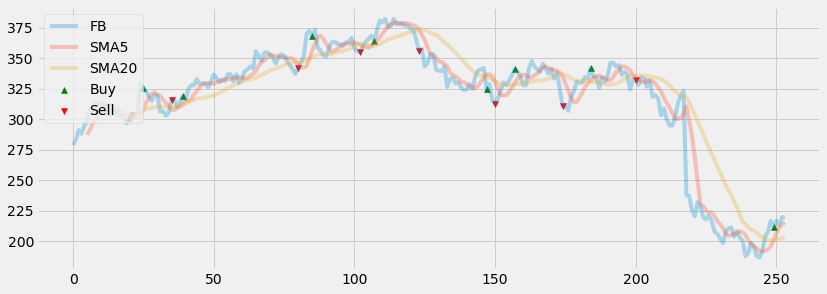

In [83]:
# visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['FB'], label='FB', alpha=0.3)
plt.plot(data['SMA5'], label='SMA5', alpha=0.3)
plt.plot(data['SMA20'], label='SMA20', alpha=0.3)
plt.scatter(data.index, data['Buy Signal'],
            label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell Signal'],
            label='Sell', marker='v', color='red')
plt.legend(loc='upper left')
